In [ ]:
%pip install seaborn



In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [6]:
from google.colab import files
files.upload()  # Allows you to manually upload the file


Saving Education_Sector_Indicators.csv to Education_Sector_Indicators.csv


{'Education_Sector_Indicators.csv': b'Country Name,Country ISO3,Year,Indicator Name,Indicator Code,Value\nAlgeria,DZA,2007.0,Female pupils below minimum reading proficiency at end of primary (%). Low GAML threshold,SE.LPV.PRIM.BMP.FE,64.5856323242188\nAlgeria,DZA,2007.0,Male pupils below minimum reading proficiency at end of primary (%). Low GAML threshold,SE.LPV.PRIM.BMP.MA,68.4463729858398\nAlgeria,DZA,2007.0,Female primary school age children out-of-school (%),SE.LPV.PRIM.OOS.FE,5.09397888183594\nAlgeria,DZA,2007.0,Male primary school age children out-of-school (%),SE.LPV.PRIM.OOS.MA,3.18795013427734\nAlgeria,DZA,2011.0,"Enrolment in pre-primary education, both sexes (number)",SE.PRE.ENRL,490035.0\nAlgeria,DZA,2010.0,"Enrolment in pre-primary education, both sexes (number)",SE.PRE.ENRL,500165.0\nAlgeria,DZA,2009.0,"Enrolment in pre-primary education, both sexes (number)",SE.PRE.ENRL,464499.0\nAlgeria,DZA,2008.0,"Enrolment in pre-primary education, both sexes (number)",SE.PRE.ENRL,20

In [7]:
df = pd.read_csv('Education_Sector_Indicators.csv')

In [8]:
df["Indicator Code"].nunique()

195

In [9]:
df["Indicator Code"].unique()


array(['SE.LPV.PRIM.BMP.FE', 'SE.LPV.PRIM.BMP.MA', 'SE.LPV.PRIM.OOS.FE',
       'SE.LPV.PRIM.OOS.MA', 'SE.PRE.ENRL', 'SE.PRE.ENRL.FE',
       'SE.PRE.PRIV.ZS', 'SE.PRE.TCHR', 'SE.PRE.TCHR.FE',
       'SE.PRE.TCHR.FE.ZS', 'SE.PRM.ENRL.FE', 'SE.PRM.TCHR.FE',
       'SE.SEC.DURS.LO', 'SE.SEC.DURS.UP', 'SE.SEC.ENRL.FE',
       'SE.SEC.ENRL.VO.ZS', 'SE.SEC.ENRR.LO', 'SE.SEC.ENRR.LO.FE',
       'SE.SEC.ENRR.LO.MA', 'SE.SEC.ENRR.UP', 'SE.SEC.ENRR.UP.FE',
       'SE.SEC.ENRR.UP.MA', 'SE.TER.CMPL.FE.ZS', 'SE.TER.CMPL.MA.ZS',
       'SE.TER.CMPL.ZS', 'SE.TER.ENRL', 'SE.TER.ENRL.FE',
       'SE.TER.GRAD.AG.ZS', 'SE.TER.GRAD.ED.ZS', 'SE.TER.GRAD.EN.ZS',
       'SE.TER.GRAD.HL.ZS', 'SE.TER.GRAD.HU.ZS', 'SE.TER.GRAD.OT.ZS',
       'SE.TER.GRAD.SC.ZS', 'SE.TER.GRAD.SS.ZS', 'SE.TER.GRAD.SV.ZS',
       'SE.TER.PRIV.ZS', 'SE.TER.TCHR', 'SE.TER.TCHR.FE', 'SE.TOT.ENRR',
       'SE.ADT.1524.LT.FE.ZS', 'SE.ADT.1524.LT.FM.ZS',
       'SE.ADT.1524.LT.MA.ZS', 'SE.ADT.1524.LT.ZS', 'SE.ADT.LITR.FE.ZS',
       'S

In [10]:

df_filtered = df[df["Indicator Code"].isin(["SE.TER.ENRL"])]
# df_filtered
df_filtered.info()



<class 'pandas.core.frame.DataFrame'>
Index: 27 entries, 487 to 513
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    27 non-null     object 
 1   Country ISO3    27 non-null     object 
 2   Year            27 non-null     float64
 3   Indicator Name  27 non-null     object 
 4   Indicator Code  27 non-null     object 
 5   Value           27 non-null     float64
dtypes: float64(2), object(4)
memory usage: 1.5+ KB


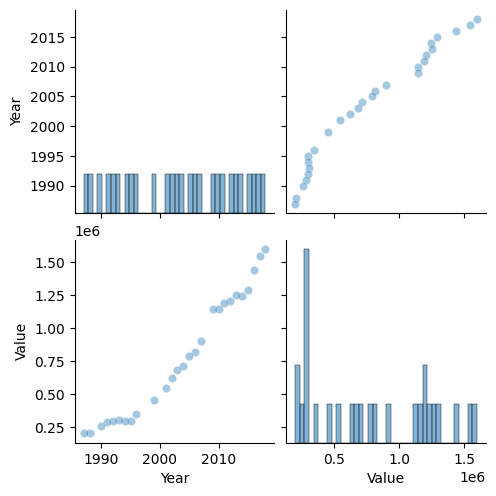

In [11]:
# df_higher_edu
sns.pairplot(df_filtered,
             kind='scatter',
             plot_kws={'alpha':0.4},
             diag_kws={'alpha':0.55, 'bins':40})

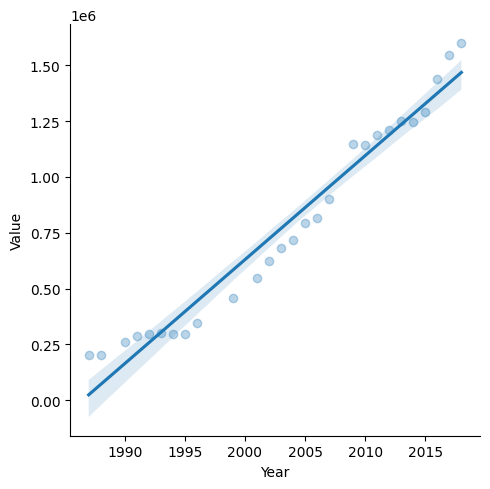

In [12]:
sns.lmplot(x='Year',
           y='Value',
           data = df_filtered,
           scatter_kws={'alpha':0.3})

In [13]:
# df_higher_edu = df_higher_edu.dropna(subset=['Year', 'Value'])
df_filtered = df_filtered.dropna(subset=['Year', 'Value'])


In [14]:
x=df_filtered['Year'].to_numpy().reshape(-1, 1) # Reshape x to be a 2D array
y=df_filtered['Value'].to_numpy().reshape(-1,1) # Reshape x to be a 2D array

In [15]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3)  # يمكن تجربة 2 أو 3 حسب الدقة
X_poly = poly.fit_transform(x_train)
model_poly = LinearRegression()
model_poly.fit(X_poly, y_train)


NameError: name 'x_train' is not defined

In [17]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split # Import train_test_split

# ... (Your previous code) ...

x=df_filtered['Year'].to_numpy().reshape(-1, 1) # Reshape x to be a 2D array
y=df_filtered['Value'].to_numpy().reshape(-1,1) # Reshape x to be a 2D array

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) # Added train_test_split

poly = PolynomialFeatures(degree=3)  # يمكن تجربة 2 أو 3 حسب الدقة
X_poly = poly.fit_transform(x_train)
model_poly = LinearRegression()
model_poly.fit(X_poly, y_train)

# ... (Rest of your code) ...

LinearRegression()

In [18]:
x_test_poly = poly.transform(x_test)
# Instead of using the original model, use the model trained on polynomial features
y_pred = model_poly.predict(x_test_poly)

In [19]:
from sklearn.metrics import mean_absolute_error, r2_score

# حساب الأخطاء
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"🔍 متوسط الخطأ المطلق (MAE): {mae:.2f}")
print(f"📊 معامل التحديد (R² Score): {r2:.4f}")  # كلما اقترب من 1، كان النموذج أفضل


🔍 متوسط الخطأ المطلق (MAE): 52379.74
📊 معامل التحديد (R² Score): 0.9703


In [22]:
import numpy as np

year = np.array([[2018]])  # Removed extra space before 'year'

# Use model_poly for prediction, not 'model'
prediction_2025 = model_poly.predict(poly.transform(year)) # Apply poly transform and predict using model_poly

# print(f"📢 التوقع لعدد الطلاب في 2024: {int(prediction_2025[0][0])} طالب")
print({int(prediction_2025[0][0])} ,year)

{1547933} [[2018]]


In [26]:
import pandas as pd

# إنشاء DataFrame لعرض السنة، القيم الحقيقية، والقيم المتوقعة
df_results = pd.DataFrame({
    "Year": x_test.flatten(),   # السنة
    "Actual Value": y_test.flatten(),  # القيم الحقيقية
    "Predicted Value": y_pred.flatten()  # القيم المتوقعة
})

# طباعة أول 10 نتائج
df_results["Error %"] = abs(df_results["Actual Value"] - df_results["Predicted Value"]) / df_results["Actual Value"] * 100
print(df_results)  # طباعة أول 10 نتائج


     Year  Actual Value  Predicted Value    Error %
0  2010.0     1144271.0     1.067852e+06   6.678368
1  2004.0      716452.0     7.233204e+05   0.958675
2  2009.0     1149666.0     1.008006e+06  12.321801
3  1993.0      303111.0     2.820397e+05   6.951662
4  2018.0     1600676.0     1.547934e+06   3.294996
5  2006.0      817968.0     8.334863e+05   1.897182


In [27]:
import numpy as np

# حساب نسبة الخطأ لكل سنة
df_results["Error %"] = abs(df_results["Actual Value"] - df_results["Predicted Value"]) / df_results["Actual Value"] * 100

# حساب إجمالي نسبة الخطأ
mape = np.mean(df_results["Error %"])

print(f"📊 إجمالي نسبة الخطأ المطلقة (MAPE): {mape:.2f}%")


📊 إجمالي نسبة الخطأ المطلقة (MAPE): 5.35%
